In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler

%load_ext autoreload
%autoreload 2
import main

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [100]:
df = pd.read_csv('ex2data2.txt', header=None, names=['first_test', 'second_test', 'is_passed'])

poly = PolynomialFeatures(degree=6, include_bias=False)
x = poly.fit_transform(df[['first_test', 'second_test']])

scaler = MinMaxScaler()
x = scaler.fit_transform(x)

x = pd.DataFrame(x)
x.insert(0, 'dummy', 1)

y = df.is_passed

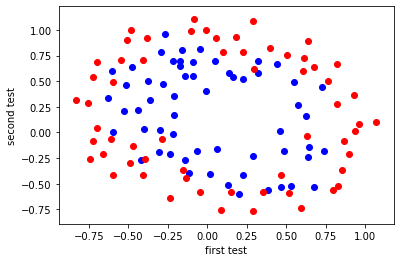

In [101]:
%matplotlib inline
import matplotlib.pyplot as plt

is_passed = df[df.is_passed == 1]
is_not_passed = df[df.is_passed == 0]
plt.scatter(is_passed.first_test, is_passed.second_test, c='blue')
plt.scatter(is_not_passed.first_test, is_not_passed.second_test, c='red')
plt.xlabel('first test')
plt.ylabel('second test')

plt.show()

In [102]:
alpha = 1
tolerance = 0.0005
reg_param = 0.02
theta_0 = pd.Series(0, index=range(len(x.columns)))

prev_loss = None
theta = None
_progress = []
for current_theta, loss in main.gradient_descent(theta_0, x, y, alpha, reg_param):
    _progress.append(loss)
    delta = 0 if loss == 0 \
        else tolerance if prev_loss is None \
        else (prev_loss - loss) / loss
    if delta < 0:
        raise ValueError('Loss increases. Decrease the learning rate')
    if delta < tolerance:
        theta = current_theta
        break
    prev_loss = loss
progress = pd.DataFrame(_progress)

print('Finished in {} iterations. Final loss: {}'.format(len(progress), progress.iloc[-1][0]))

Finished in 288 iterations. Final loss: 0.40847593782101277


In [103]:
from scipy.optimize import minimize

print('Out loss: {}'.format(progress.iloc[-1][0]))

func = lambda _theta: main.logistic_loss(_theta, x, y, reg_param)

# NOTE: we terminate by relative sensitivity

result = minimize(func, theta_0, method='Nelder-Mead', tol=tolerance)
print('Nelder-Mead Loss: {}'.format(result.fun))

result = minimize(func, theta_0, method='BFGS', tol=tolerance)
print('BFGS Loss: {}'.format(result.fun))

Out loss: 0.40847593782101277
Nelder-Mead Loss: 0.6931471805599454
BFGS Loss: 0.3481726954795775


In [113]:
def hypothesis(sample):
    sample = np.reshape(sample, (1, -1))
    full_sample = poly.transform(sample)
    scaled = scaler.transform(full_sample)
    scaled = np.insert(scaled, 0, 1)
    return main.logistic_hypothesis(scaled, theta)

print(hypothesis([0.65, 0.25]))

0.6670337612473736


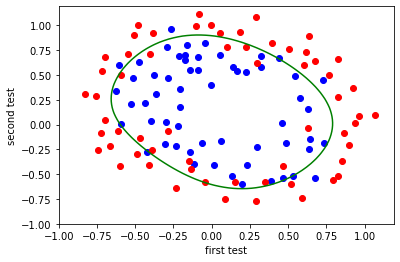

In [120]:
is_passed = df[df.is_passed == 1]
is_not_passed = df[df.is_passed == 0]
plt.scatter(is_passed.first_test, is_passed.second_test, c='blue')
plt.scatter(is_not_passed.first_test, is_not_passed.second_test, c='red')
plt.xlabel('first test')
plt.ylabel('second test')

delta = 0.03
xrange = np.arange(-1, 1.2, delta)
yrange = np.arange(-1, 1.2, delta)
X, Y = np.meshgrid(xrange,yrange)

F = np.apply_along_axis(hypothesis, 2, np.dstack((X, Y))) - 0.5

plt.contour(X, Y, F, [0], colors='green')
plt.show()